## K-Means Clustering Algorithm Example
### Amir, NUS SoC ACE, 2025


In [3]:
# Dependencies and libraries
%matplotlib inline
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Connecting to Google drive and openning the file
# path plus file is there, file is celebs2.csv
# Variables are Height in cm, Weight in kg, and sex, 1= female , 2= male
#

# Load the dataset
file_path = "celebs2.csv"
file_path1 = "Iris.xlsx"

In [41]:
# We just use Height and Weight for clustering.
# X is our feature matrix, can be seen here
train = pd.read_csv(file_path)
train1 = pd.read_excel(file_path1)
type(train)
X = train.values
X1 = train1.values
print(type(X))
#print(X)
print(X1)
#X = X[:,0:2]
X1 = X1[:,0:2]


<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 '

In [44]:
# Shape of the feature matrix
X.shape
X1.shape

(150, 2)

#### Important Cell
1. The model, called kmeans, is defined as an instance of class KMeans
2. We declare hyper parameters as number of clusters, n_cluster, maximum training iterations, and the name of training algorithm, here algorithm= 'lloyd'
3. Also, we can use 'elkan' as the training algorithm
4. then we call the function fit for that kmeans model to train it.

In [30]:
kmeans = KMeans(n_clusters=2, max_iter=40 , algorithm = 'lloyd')  # or algorithm='lloyd or elkan')
kmeans.fit(X)

KMeans(max_iter=40, n_clusters=2)

In [31]:
# to see the type of that abstract data type/ instance of class KMeans, called
# kmeans
#
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [32]:
# then we test the model by asking that to provide cluster labels for the X
# or the feature vector. Function predict does that
y_kmeans = kmeans.predict(X)

In [24]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int32)

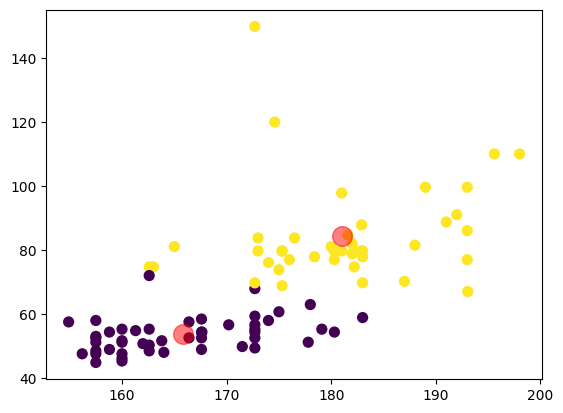

In [33]:
# scatter plot to show the clusters in our 2d feature space.
# Samples belong to each cluster shown in different colors
# big pink dots are cluster centers
#
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [19]:
y_kmeans.shape

(90,)

In [34]:
# showing the cluster labels and cluster centers
#
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int32)

In [35]:
kmeans.cluster_centers_

array([[165.86125   ,  53.6333125 ],
       [181.01047619,  84.34428571]])

In [37]:
from sklearn.metrics.pairwise import pairwise_distances
intercluster_dist_matrix = pairwise_distances(kmeans.cluster_centers_
, kmeans.cluster_centers_
, metric='euclidean')

print(intercluster_dist_matrix)

[[ 0.         34.24416636]
 [34.24416636  0.        ]]


## Now it's the practice time...
1. Study the effects of changing the number of clusters to 3 and 4, n_cluster=...
2. Study the effects of changing the clustering algorithm from lloyd to elkan
3. Study the meaning of inter_cluster_distance and intra_cluster_distance
4. Answer please, after a good clusterng the intra_cluster_distance to inter_cluster_distance ratio should be (max/min).
5. Develop a function to compute  the intra_cluster_distance and  inter_cluster_distance. Input parameters are the feature matrix, X, and cluster labels predicted by any given clustering algorithm, e.g., y_kmeans here.
6. Try iris.csv dataset and go for n_cluster= 2 and 3 and 4. Use lloyd algorithm.
7. Which one provides the smallest intra to inter_cluster_distance ratio?

1. Datapoints are grouped to 3 and 4 clusters.